<a href="https://colab.research.google.com/github/rmahesh6386/Tata-Motors-Project-/blob/main/TATA_Motors_Stock_market_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction of TATA Motors Pvt Ltd

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Yahoo Finance. By looking at data from the stock market of a technology giant like TATA motors. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history.
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Mounted at /content/gdrive


In [2]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# For time stamps
from datetime import datetime

# For division
from __future__ import division

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [11]:
#stock Company for analytics
stock = ['TATAMOTORS.NS']
data_source = 'yahoo' 

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

# Set DataFrame as the Stock Ticker
TM = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
TM.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,418.299988,424.000000,410.000000,411.799988,411.799988,20121916
2022-07-01,410.649994,414.600006,402.299988,412.700012,412.700012,14725989
2022-07-04,411.549988,414.899994,405.000000,408.450012,408.450012,11525133
2022-07-05,415.000000,418.799988,410.200012,412.000000,412.000000,16771012
2022-07-06,414.000000,417.299988,410.649994,416.350006,416.350006,12193652


In [6]:
TM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-06,238.442459,241.113815,234.880676,238.096176,231.216492,12442040
2012-07-09,235.672180,240.718063,235.672180,238.294052,231.408646,10330684
2012-07-10,239.877075,245.763931,239.283447,243.884094,236.837158,12579287
2012-07-11,241.707443,243.686218,237.255203,238.887695,231.985123,8793244
2012-07-12,237.947769,238.244583,233.297653,234.287033,227.517395,9513820


In [7]:
# Summery stats for the Stock
TM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2.464000e+03
mean,337.972994,342.842222,332.479303,337.421347,336.872485,2.208574e+07
std,129.683944,130.817310,128.220511,129.455068,129.531352,3.037261e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,0.000000e+00
25%,245.692047,250.712502,241.116215,246.181477,244.908558,6.212536e+06
50%,345.399994,351.292130,339.475006,344.824997,344.264343,9.903956e+06
75%,441.437325,447.399994,434.434776,440.199997,439.442947,2.526091e+07
max,600.212097,605.901123,589.873047,598.134399,597.892273,3.905778e+08


In [12]:
TM.shape

(2464, 6)

In [8]:
# General Info
TM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2012-07-06 to 2022-07-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2464 non-null   float64
 1   High       2464 non-null   float64
 2   Low        2464 non-null   float64
 3   Close      2464 non-null   float64
 4   Adj Close  2464 non-null   float64
 5   Volume     2464 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.8 KB


In [17]:
TM.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the TM(Tata Motors) stocks.

Volume is an indicator that means the total number of shares that have been bought or sold in a specific period of time or during the trading day

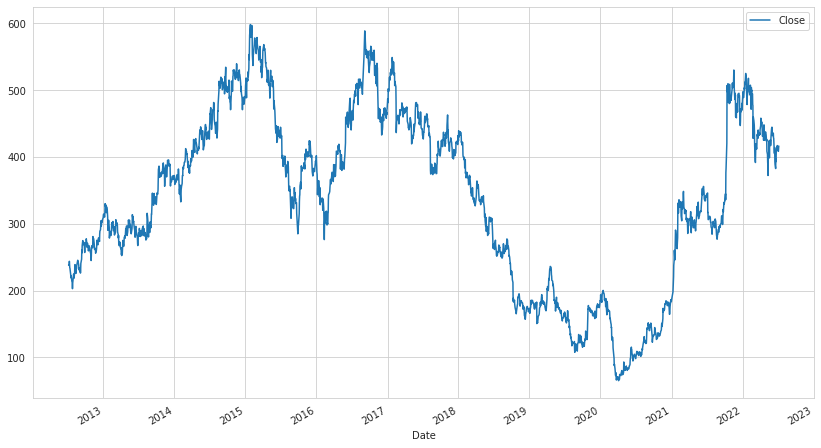

In [14]:
# Let's see a historical view of the closing price
TM['Close'].plot(legend=True, figsize=(14,8))

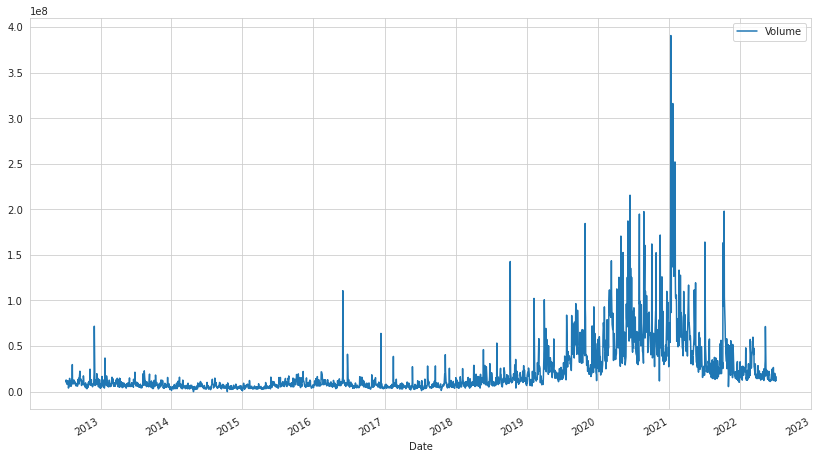

In [16]:
# Now let's plot the total volume of stock being traded each day over the past 10 year

TM['Volume'].plot(legend=True, figsize=(14,8))

We can see that in first Quarter of 2021 was the higher for TATA Motors stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for TM stock. Let's go ahead and caculate the moving average for the TM stock.

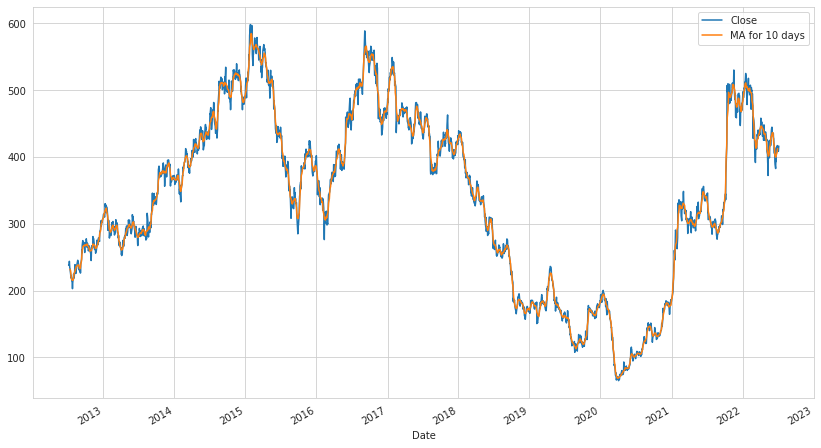

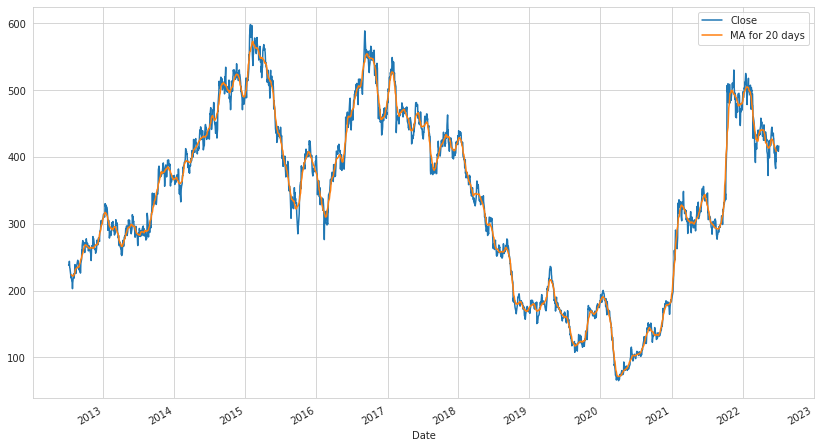

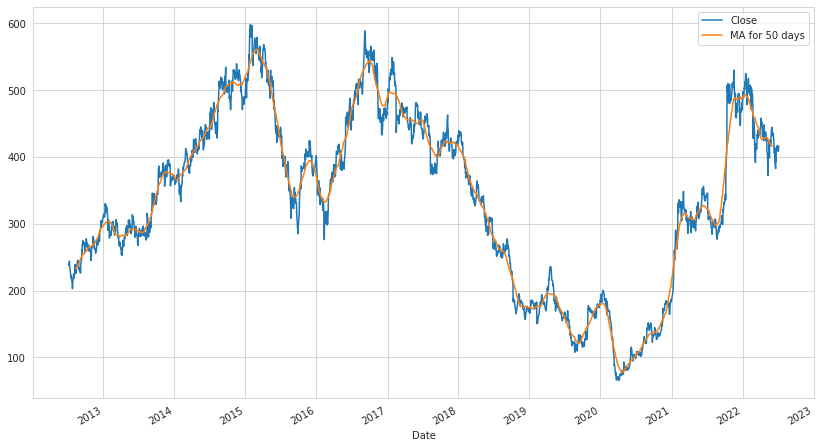

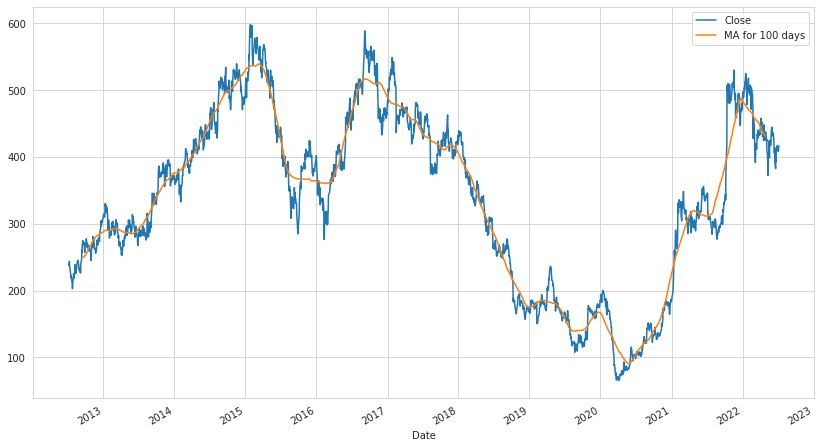

In [81]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma)),
    rolling = TM['Close'].rolling(ma, center=True)
    data= pd.DataFrame({'Close': TM['Close'], 
                        'MA for %s days' %(str(ma)): rolling.mean()})
    ax = data.plot(subplots=False,figsize=(14,8))